In [1]:
import pickle
import os
import sys
import warnings

import numpy as np
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier

sys.path.append('../src/flare_classifier')
import mlprocessing as mlp
import postfilter as pf
from mlprocessing import CatBoostClassifierCalibrate


# 1. Predict real data

In [ ]:
%%time

warnings.filterwarnings('ignore')

mlp.predict_real_data()

# 2. Postfilter

In [ ]:
%%time

result = pf.get_data_to_postfilter(threshold=0.9)

In [ ]:
result.shape

In [ ]:
%%time
result = pd.read_csv('../data/predict-data/all_fields_threshold-0.9.csv')
result['min_prob'].hist(bins=100)

In [ ]:
result[result['min_prob']>0.98].shape

In [ ]:
pred_result = pd.read_csv('../data/predict-data/all_fields_0.96.csv')
pred_result.shape

In [ ]:
pred_result['min_prob'].hist(bins=100)

In [ ]:
result[result['min_prob']>0.98].to_csv('../data/predict-data/all_fields_0.98.csv', index=False)

In [ ]:
result = pd.read_csv('../data/predict-data/all_fields_0.98.csv')
result = pf.get_coordinats_to_candidates(
     '../data/predict-data/all_fields_0.98.csv'
)

In [ ]:
result.info()

In [ ]:
result = pd.read_csv('../data/predict-data/all_fields_0.98_coord.csv')
result = pf.search_asteroids(result)
result.to_csv('../data/predict-data/all_fields_0.98_asteroid.csv', index=False)

In [ ]:
result = pd.read_csv('../data/predict-data/all_fields_0.98_asteroid.csv')
result.asteroid.value_counts()

In [ ]:
result = pd.merge(
    result,
    df_pred[['oid', 'flare_start', 'sharpness_flare_start', 'sharpness_time_maximum']],
    how='left',
    on=['oid', 'flare_start']
)
result.info()

In [ ]:
result.to_csv('../data/predict-data/all_fields_0.98_part_sharpness.csv', index=False)

In [11]:
warnings.filterwarnings('ignore')
result = pd.read_csv('../data/predict-data/all_fields_0.98_part_sharpness.csv')
result = result[result.asteroid==False]
result_sharpness = pf.get_sharpness(result)
result_sharpness.to_csv('../data/predict-data/all_fields_0.98_sharpness.csv', index=False)

 84%|████████▎ | 36709/43918 [17:40:02<3:16:33,  1.64s/it]

Exception message [Errno 110] Connection timed out


 85%|████████▍ | 37243/43918 [17:57:04<3:17:04,  1.77s/it]  

Exception message [Errno 110] Connection timed out


 85%|████████▌ | 37522/43918 [18:07:32<4:35:42,  2.59s/it]  

Exception message [Errno 110] Connection timed out


 87%|████████▋ | 38035/43918 [18:24:28<2:24:26,  1.47s/it] 

Exception message [Errno 110] Connection timed out


 87%|████████▋ | 38317/43918 [18:37:40<4:42:14,  3.02s/it] 

Exception message [Errno 110] Connection timed out


 90%|████████▉ | 39336/43918 [19:11:20<4:00:10,  3.14s/it] 

Exception message [Errno 110] Connection timed out


 91%|█████████ | 39909/43918 [19:31:44<2:34:03,  2.31s/it] 

Exception message [Errno 110] Connection timed out


 92%|█████████▏| 40337/43918 [19:48:47<2:37:03,  2.63s/it] 

Exception message [Errno 110] Connection timed out


 93%|█████████▎| 40928/43918 [20:12:18<1:26:27,  1.73s/it] 

Exception message [Errno 110] Connection timed out


 93%|█████████▎| 41055/43918 [20:23:11<2:22:48,  2.99s/it] 

Exception message [Errno 110] Connection timed out


 94%|█████████▍| 41421/43918 [20:43:39<1:20:08,  1.93s/it] 

Exception message [Errno 110] Connection timed out


 96%|█████████▋| 42295/43918 [21:16:31<59:28,  2.20s/it]   

Exception message [Errno 110] Connection timed out


 97%|█████████▋| 42383/43918 [21:24:03<1:33:50,  3.67s/it] 

Exception message [Errno 110] Connection timed out


 97%|█████████▋| 42554/43918 [21:37:06<43:45,  1.93s/it]   

Exception message [Errno 110] Connection timed out


 98%|█████████▊| 42865/43918 [21:49:28<20:48,  1.19s/it]   

Exception message [Errno 110] Connection timed out


 98%|█████████▊| 43160/43918 [22:01:54<31:19,  2.48s/it]   

Exception message [Errno 110] Connection timed out


 99%|█████████▉| 43675/43918 [22:27:51<10:24,  2.57s/it]   

Exception message [Errno 110] Connection timed out


100%|█████████▉| 43849/43918 [22:36:49<01:57,  1.70s/it]  

Exception message [Errno 110] Connection timed out


100%|██████████| 43918/43918 [22:42:23<00:00,  1.86s/it]  


In [13]:
result_sharpness = pd.read_csv('../data/predict-data/all_fields_0.98_sharpness.csv').drop(['exposure_id_start', 'exposure_id_maximum'], axis=1)
result_sharpness.info()
result_sharpness = result_sharpness.dropna()
result_sharpness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43918 entries, 0 to 43917
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   field                   43918 non-null  int64  
 1   oid                     43918 non-null  int64  
 2   flare_start             43918 non-null  float64
 3   time_maximum            43918 non-null  float64
 4   fwhm_start              43918 non-null  float64
 5   fwhm_maximum            43918 non-null  float64
 6   min_prob                43918 non-null  float64
 7   diff_fwhm               43918 non-null  float64
 8   ra                      43918 non-null  float64
 9   dec                     43918 non-null  float64
 10  asteroid                43918 non-null  bool   
 11  asteroid_name           43918 non-null  object 
 12  sharpness_flare_start   41301 non-null  float64
 13  sharpness_time_maximum  41301 non-null  float64
 14  diff_sharpness          41301 non-null

In [14]:
%%time

scaler = pickle.load(open('../models/scaler_postfilter.pkl', 'rb'))
logreg = pickle.load(open('../models/logreg_postfilter.pkl', 'rb'))
feature_cols = [
    'sharpness_flare_start',
    'sharpness_time_maximum',
    'diff_sharpness',
    'fwhm_start',
    'fwhm_maximum',
    'diff_fwhm',
]
x = result_sharpness[feature_cols]
x_sc = scaler.transform(x)
result_sharpness['postfilter_prob'] = logreg.predict_proba(x_sc)[::, 1]
result_sharpness.to_csv(
    '../data/predict-data/all_fields_postfilter_0.98.csv', index=False
)
print('prediction done')

prediction done
CPU times: user 757 ms, sys: 826 ms, total: 1.58 s
Wall time: 673 ms


# Analys postfilter predict

In [15]:
df = pd.read_csv('../data/predict-data/all_fields_postfilter_0.98.csv')
df = df[df.asteroid==False]
df.head()

,field,oid,flare_start,time_maximum,fwhm_start,fwhm_maximum,min_prob,diff_fwhm,ra,dec,asteroid,asteroid_name,sharpness_flare_start,sharpness_time_maximum,diff_sharpness,postfilter_prob
0,257,257203200000012,58471.30542,58471.33327,2.456885,4.210275,0.982524,-1.753390,87.977554,-26.233704,False,No object,0.057,-0.018,0.075,0.967722
1,257,257204100006526,58472.29658,58472.34094,2.383465,2.397610,0.997666,-0.014145,87.594658,-26.573435,False,No object,-0.028,-0.012,-0.016,0.999487
2,257,257204100002386,58468.30841,58468.37145,2.468960,2.293200,0.982524,0.175760,87.655884,-26.356758,False,No object,-0.056,-0.024,-0.032,0.999797
3,257,257214400000097,58471.29662,58471.30803,3.272000,2.302590,0.980793,0.969410,91.480103,-21.357557,False,No object,-0.004,-0.020,0.016,0.999564
4,257,257214400015143,58472.29690,58472.33853,2.383465,2.462460,0.995623,-0.078995,91.239693,-22.048550,False,No object,-0.037,-0.003,-0.034,0.999389


<Axes: >

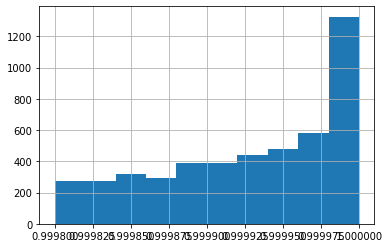

In [18]:
df[df.postfilter_prob>0.9998].postfilter_prob.hist(bins=10)

In [17]:
df[df.postfilter_prob>0.9998].shape

(4763, 16)

In [2]:
link = 'https://ztf.snad.space/dr17/view/'
df = pd.read_csv('../data/predict-data/all_fields_postfilter_0.98.csv')
df = df[df.postfilter_prob>0.9998]
file = df[
    ['oid', 'flare_start', 'time_maximum', 'postfilter_prob']
].reset_index(drop=True)
file['link'] = [
    f'{link}{o}?min_mjd={s}&max_mjd={m+0.3}'
    for o, s, m in zip(file['oid'], file['flare_start'], file['time_maximum'])
]
file['tag'] = ''
file.to_csv(
    '../data/predict-data/candidates_dr17.csv', index=False
)
file.head()

,oid,flare_start,time_maximum,postfilter_prob,link,tag
0,257207200014907,58468.30851,58468.38388,0.999894,https://ztf.snad.space/dr17/view/2572072000149...,
1,257207200014674,58468.30850,58468.37245,0.999802,https://ztf.snad.space/dr17/view/2572072000146...,
2,257202300015543,58468.30827,58468.39779,0.999940,https://ztf.snad.space/dr17/view/2572023000155...,
3,257208300005695,58468.30895,58468.34960,0.999964,https://ztf.snad.space/dr17/view/2572083000056...,
4,257206300001713,58468.30847,58468.37333,0.999854,https://ztf.snad.space/dr17/view/2572063000017...,


In [22]:
file.shape

(4763, 6)